#1. Memuat data

Import library yang diperlukan dan memuat data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('movie_sample_dataset.csv')

#2. Memeriksa Data

Menampilkan 5 data teratas.

In [ ]:
df.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              99 non-null     int64  
 3   gross                 91 non-null     float64
 4   genres                98 non-null     object 
 5   movie_title           99 non-null     object 
 6   title_year            99 non-null     int64  
 7   language              99 non-null     object 
 8   country               99 non-null     object 
 9   budget                95 non-null     float64
 10  imdb_score            99 non-null     float64
 11  actors                99 non-null     object 
 12  movie_facebook_likes  99 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.2+ KB


Menampilkan plot distrubsi data agar lebih mudah dalam menganalisis data.

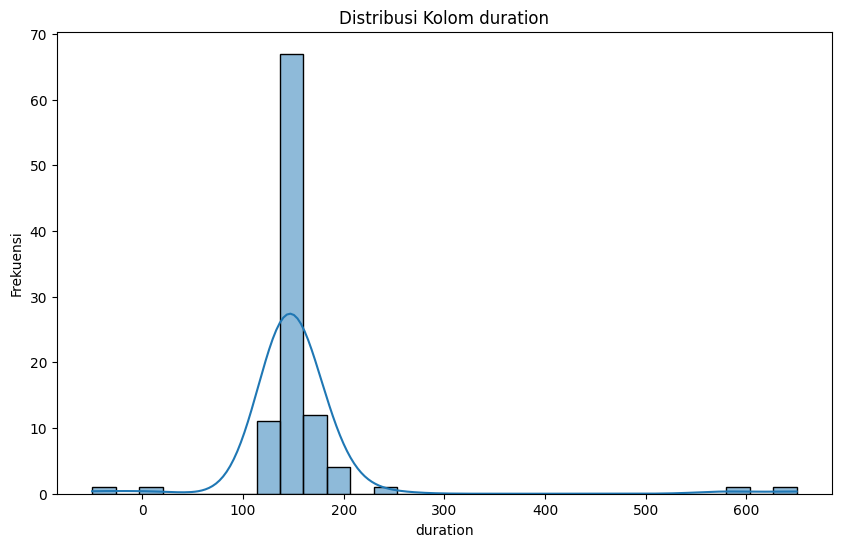

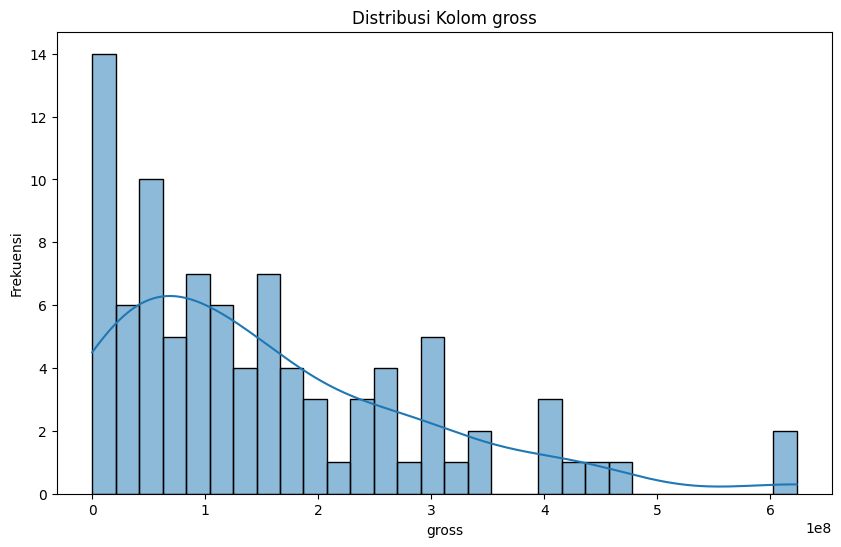

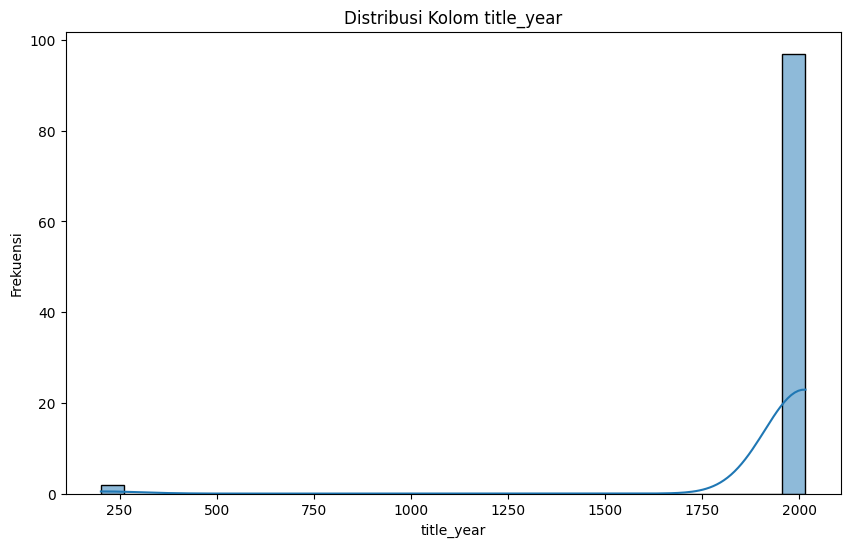

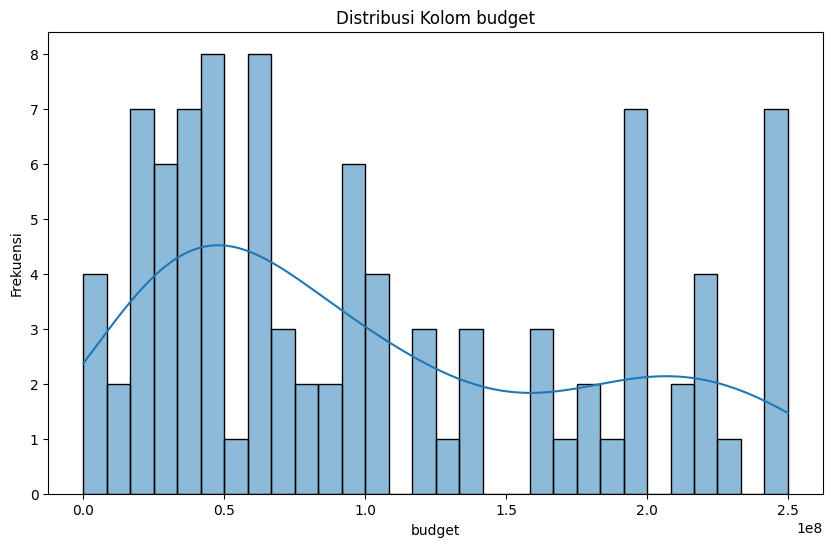

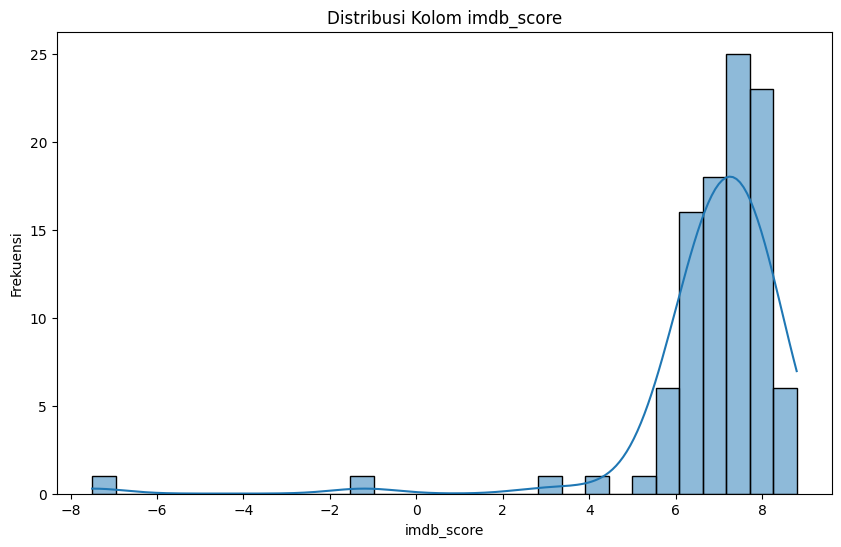

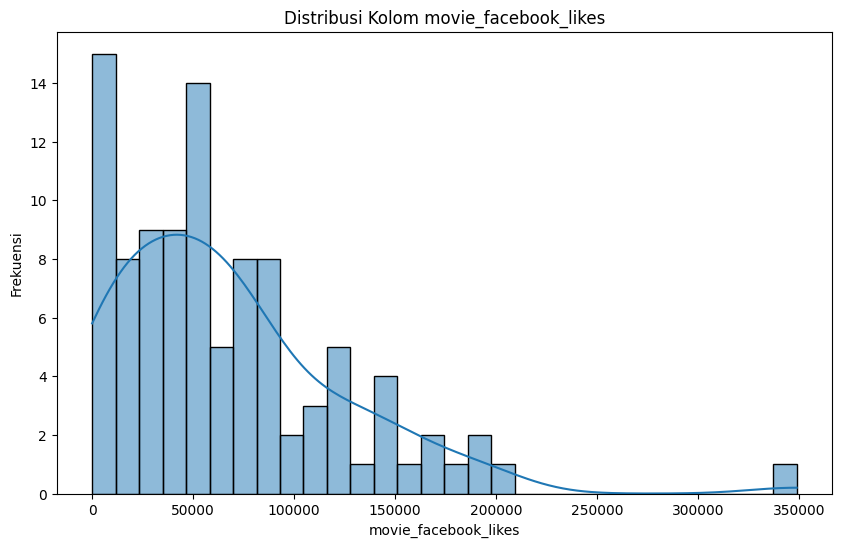

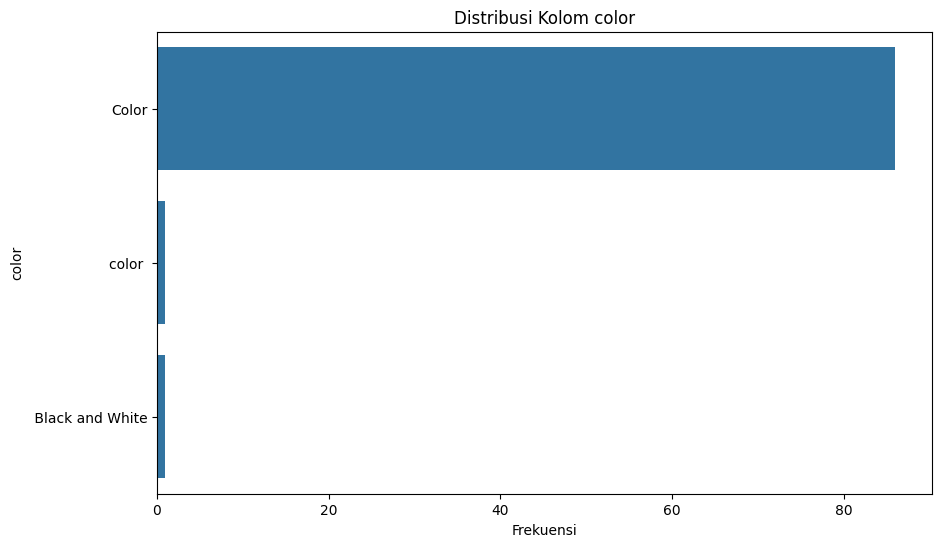

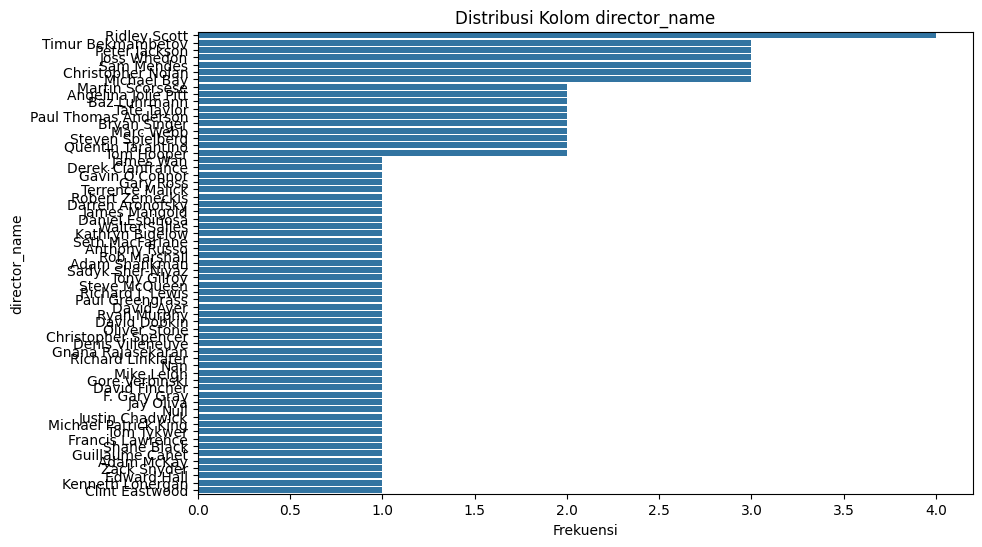

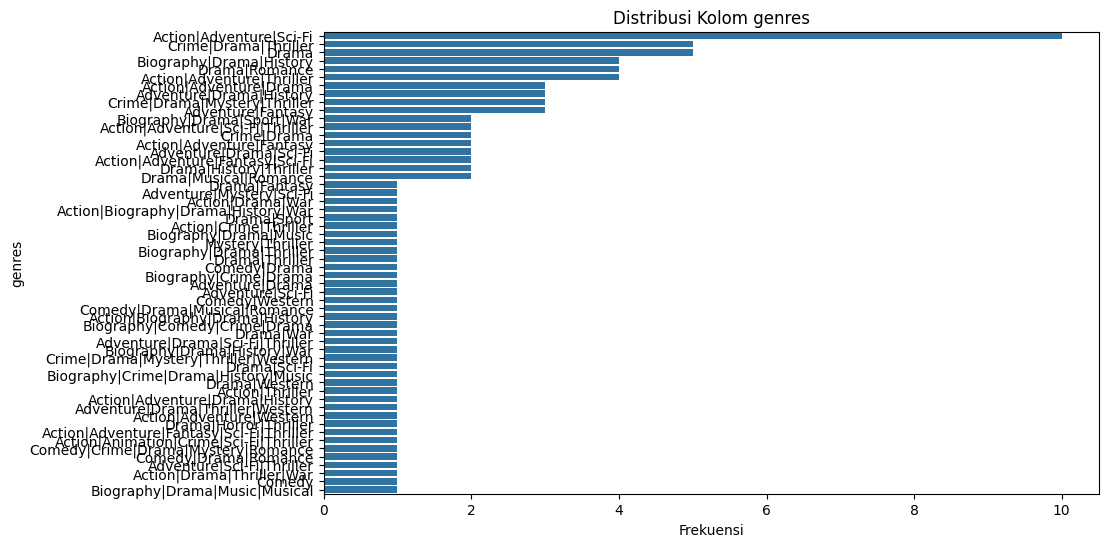

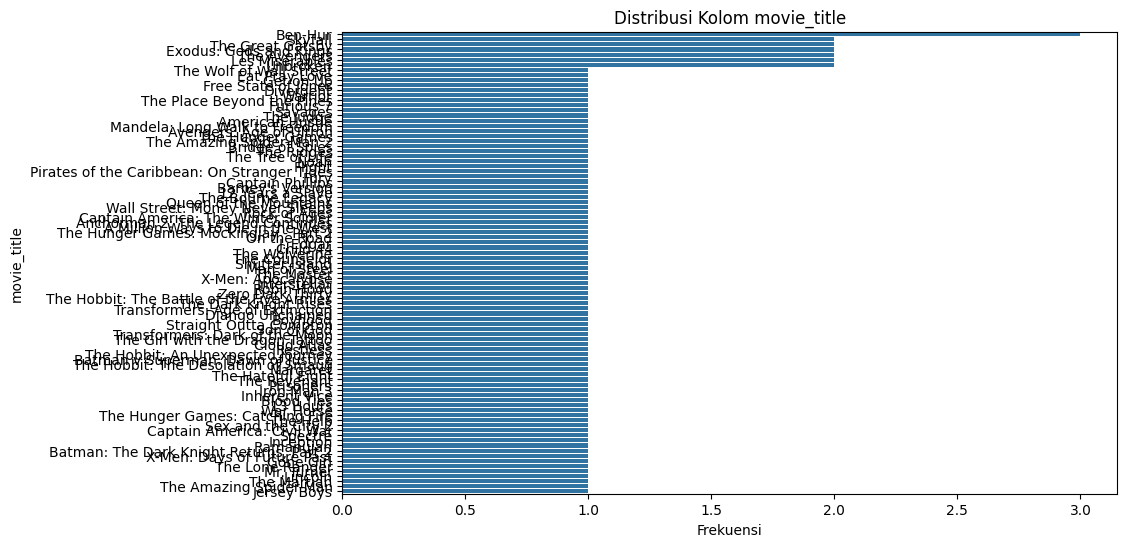

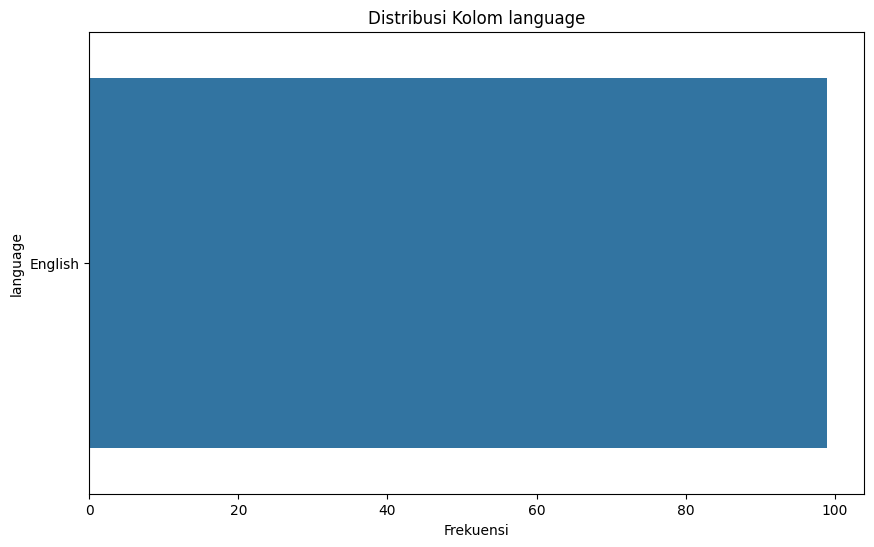

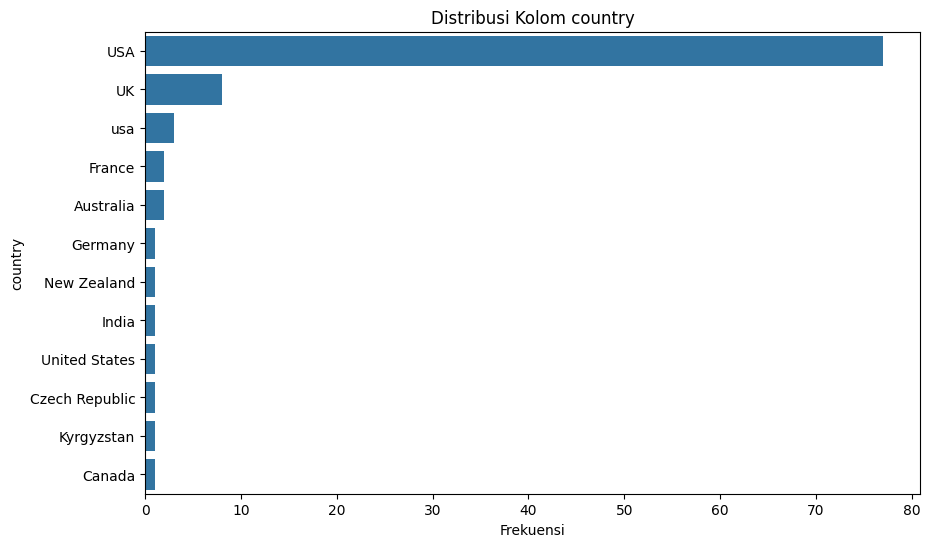

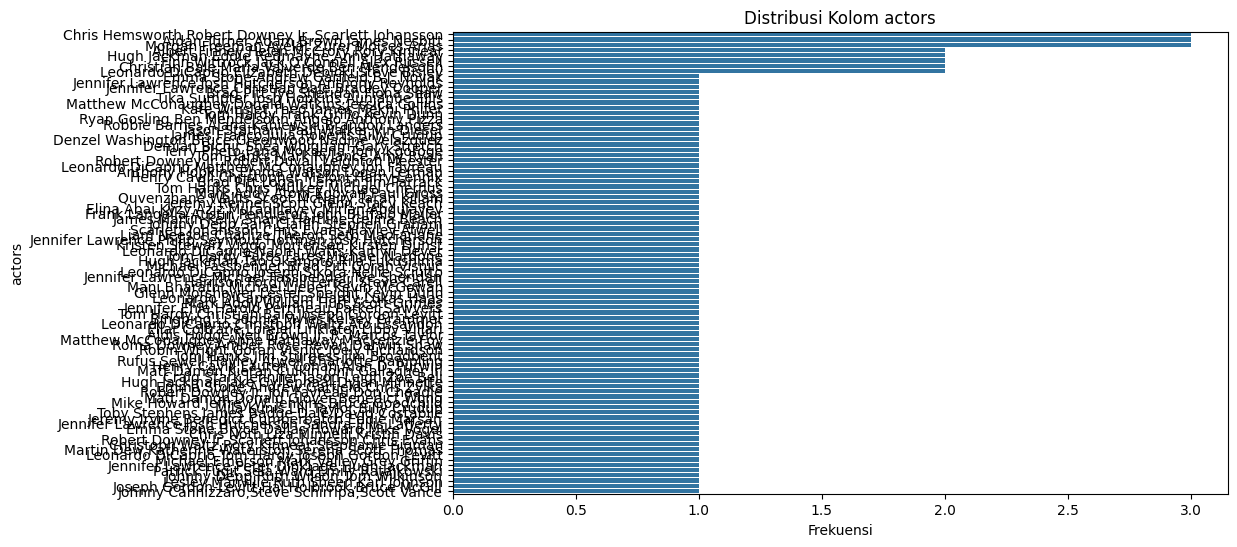

In [ ]:
# Menentukan kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Menentukan kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot distribusi untuk kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Kolom {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

# Plot distribusi untuk kolom kategorikal
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi Kolom {col}')
    plt.xlabel('Frekuensi')
    plt.ylabel(col)
    plt.show()

Pada dataset “movie_sample_dataset” missing data memiliki nilai 0, Null, dan N/A. Kita dapat melakukan replace 0, Null, dan N/A dengan
NaN (Not a number) yang merupakan penanda missing value dalam Python.

In [ ]:
# Mengganti 0, Null, dan 'N/A' dengan NaN (missing value)
df.replace([0, "Null", "N/A"], np.nan, inplace=True)

# Memeriksa jumlah missing values di setiap kolom
print(df.isnull().sum())


color                   11
director_name           12
duration                 0
gross                    8
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   4
imdb_score               0
actors                   0
movie_facebook_likes     9
dtype: int64


#3. Membersihkan Data

Menanganani missing values menggunakan replace dengan mean.

In [ ]:
# Mengganti missing values dengan rata-rata pada kolom numerik
cols_to_replace = ["gross", "budget", "movie_facebook_likes"]
for col in cols_to_replace:
    if col == "movie_facebook_likes":
        avg_value = int(df[col].astype(float).mean())  # Mengubah rata-rata ke integer hanya untuk kolom "movie_facebook_likes"
    else:
        avg_value = df[col].astype(float).mean()  # Tetap menggunakan float untuk kolom lainnya

    df[col].replace(np.nan, avg_value, inplace=True)
    print(f"Average of {col}: {avg_value}")


Average of gross: 154191431.2747253
Average of budget: 104857024.73684211
Average of movie_facebook_likes: 72650


Mengisi missing value pada kolom "color" dengan frekuensi terbesar pada kolom tersebut.

In [ ]:
# Mengisi missing value pada kolom 'color' dengan string 'Color'
df['color'] = df['color'].fillna('Color')

# Membersihkan spasi di awal dan akhir, mengubah semua huruf menjadi huruf kecil
df['color'] = df['color'].str.strip().str.lower()


In [ ]:
# Menghapus baris yang memiliki missing value pada kolom tertentu
df = df.dropna(subset=['director_name', 'genres'])

Pada plot distribusi data diatas terdapat outlier pada kolom "duration" sehingga akan dilakukan pemberishan data outlier.

In [ ]:
df = df[df['duration'] >= 100]
df = df[df['duration'] <= 300]

Text(0, 0.5, 'Frekuensi')

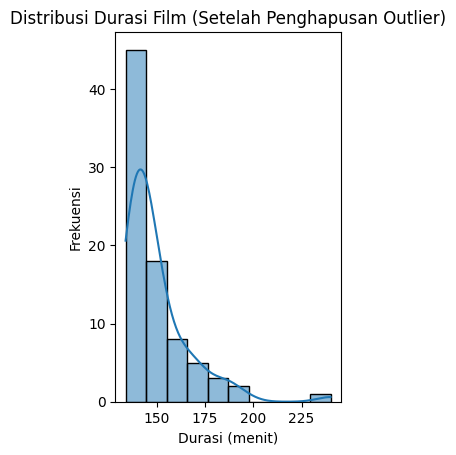

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(df['duration'], bins=10, kde=True)
plt.title('Distribusi Durasi Film (Setelah Penghapusan Outlier)')
plt.xlabel('Durasi (menit)')
plt.ylabel('Frekuensi')


<ipython-input-241-c660e4ce6b76>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frekuensi.index, y=frekuensi.values, palette='viridis')


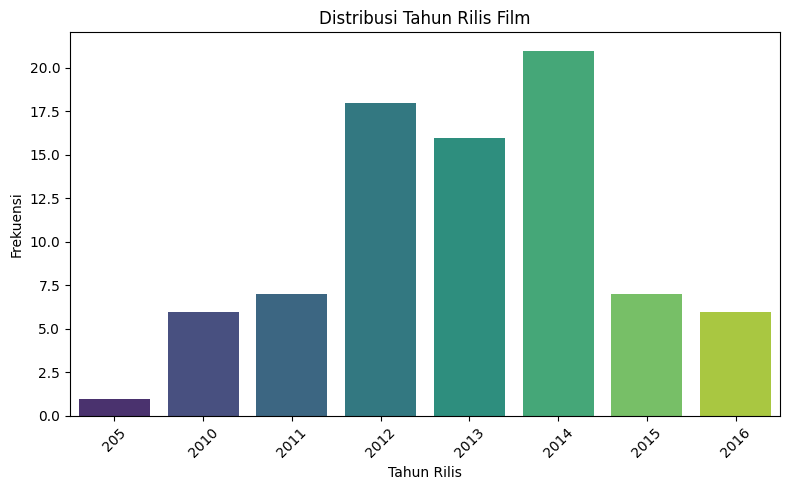

In [ ]:
# Menghitung frekuensi tahun rilis
frekuensi = df['title_year'].value_counts().sort_index()

# Menampilkan plot distribusi tahun rilis
plt.figure(figsize=(8, 5))
sns.barplot(x=frekuensi.index, y=frekuensi.values, palette='viridis')
plt.title('Distribusi Tahun Rilis Film')
plt.xlabel('Tahun Rilis')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Dikarenakan terdapat film dengan tahun rilis 205, sepertinya ada kesalahan saat penginputan data, sehingga tahun tersebut perlu diganti menjadi 2015.

In [ ]:
df['title_year'] = df['title_year'].replace(205, 2015)

Berdasarkan plot distribusi di atas, pada kolom 'imdb_score' terdapat data dengan nilai negatif. Sementara itu, nilai terendah untuk imdb score adalah 1. Kemungkinan terdapat kesalahan dalam penulisan data, sehingga format penulisan perlu diperbaiki menjadi nilai positif.

In [ ]:
df['imdb_score'] = df['imdb_score'].abs()

In [ ]:
print(df.shape)

(82, 13)


In [ ]:
# Memeriksa jumlah missing values di setiap kolom
print(df.isnull().sum())


color                   0
director_name           0
duration                0
gross                   0
genres                  0
movie_title             0
title_year              0
language                0
country                 0
budget                  0
imdb_score              0
actors                  0
movie_facebook_likes    0
dtype: int64


#4. Transformasi Data

In [ ]:
# Menggunakan replace untuk transformasi
df['color'].replace({'black and white': 0, 'color': 1}, inplace=True)


Memperbaiki format penulisan pada kolom 'country', yaitu penulisan 'USA', 'usa', dan 'United States' diseragamkan menjadi 'USA'.

In [ ]:
# Mengonversi semua nilai menjadi huruf kecil, lalu mengganti nilai
df['country'] = df['country'].str.lower().replace({'usa': 'USA', 'united states': 'USA'})

Memperbaiki format penulisan pada kolom 'genres', yaitu penulisan 'Music' dan 'Musical' diseragamkan menjadi 'Musical'.

In [ ]:
# Mengonversi semua nilai menjadi huruf kecil, lalu mengganti nilai
df['genres'] = df['genres'].str.replace('Music', 'Musical')
df['genres'] = df['genres'].str.replace('Musicalal', 'Musical')
df['genres'] = df['genres'].str.replace('Musical|Musical', 'Musical')


Melakukan one-hot encoding pada kolom 'country'.

In [ ]:
# Menggunakan get_dummies untuk One-Hot Encoding
df = pd.get_dummies(df, columns=['country'], prefix='country')

Melakukan one-hot encoding pada kolom 'genres', 'language', dan 'title_year'.

In [ ]:
# One-Hot Encoding untuk kolom 'genres', 'language' dan 'title_year'
# Pisahkan genre yang dipisahkan oleh tanda '|'
df_genres = df['genres'].str.get_dummies(sep='|')

# One-Hot Encoding untuk kolom 'language'
df_language = pd.get_dummies(df['language'], prefix='language')

# One-Hot Encoding untuk kolom 'title_year'
df_title_year = pd.get_dummies(df['title_year'], prefix='title_year')

# Gabungkan hasil One-Hot Encoding dengan dataset asli
df = pd.concat([df, df_genres, df_language, df_title_year], axis=1)


Mengonversi kolom hasil one-hot encoding yang baru menjadi tipe data boolean.

In [ ]:
columns_to_convert = [
    'color', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
    'Crime', 'Drama', 'Fantasy', 'History', 'Musical', 'Mystery', 'Romance',
    'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'
]

df[columns_to_convert] = df[columns_to_convert].astype(bool)

df = df.drop(columns=['genres', 'language', 'title_year'])

Normalisasi data pada kolom "duration", "gross", "budget", "imdb_score", dan "movie_facebook_likes". Targetnya adalah
normalisasi data tersebut sehingga nilainya berkisar antara 0 hingga 1. Teknik normalisasi yang bisa dilakukan dalam hal ini adalah Simple Feature Scaling, Min-Max, dan Z-score. Dalam kasus ini menggunakan teknik Simple Feature Scaling.

In [ ]:
df['duration'] = df['duration'] / df['duration'].max()
df['gross'] = df['gross'] / df['gross'].max()
df['budget'] = df['budget'] / df['budget'].max()
df['imdb_score'] = df['imdb_score'] / df['imdb_score'].max()
df['movie_facebook_likes'] = df['movie_facebook_likes'] / df['movie_facebook_likes'].max()

Menghapus data duplikat.

In [ ]:
df = df.drop_duplicates()
df = df.drop_duplicates(subset=['movie_title'])

In [ ]:
print(df.shape)

(74, 44)


#5. Penyimpanan Data

Menyimpan dataset yang sudah diproses ke dalam format CSV.

In [ ]:
df.to_csv('movie_dataset_cleaned.csv', index=False)